### 1. Importing Libraries
Barcoding system is a cheap and reliable way for tagging the products. Barcode detection process is needed for an invetory system to detect the barcodes of the products and for the billing system of the inventory concerned. 


In [2]:
#import the necessary packages
import numpy as np
import imutils
import cv2
import time
import matplotlib.pyplot as plt

### 2. Load the image and convert it to grayscale


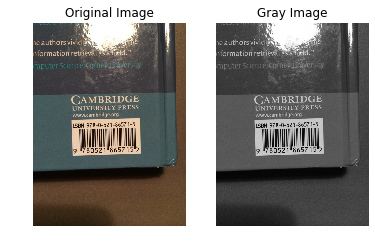

In [30]:
image= cv2.imread("barcode_04.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
fig = plt.figure()
#show first image
ax = plt.subplot("121")
ax.set_title("Original Image")
plt.imshow(image)
plt.axis("off")
#show the second image
ax = plt.subplot("122")
plt.imshow(gray, cmap = plt.cm.gray)
ax.set_title("Gray Image")
plt.axis("off")
#show the images
plt.show()

###  3. Compute the Scharr gradient magnitude representation of the images in both the x and y direction

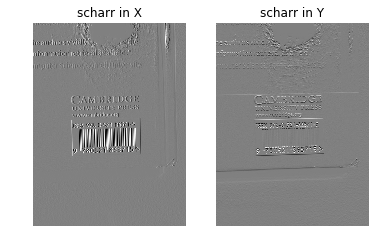

[[  -0.   14.  -50. ...   34.  -46.   -0.]
 [  -0.   -1.  -68. ...   43.  -43.   -0.]
 [  -0.  -17.  -52. ...    3.  -97.   -0.]
 ...
 [  -0.   -2.   -9. ...  -77.  -50.   -0.]
 [  -0.  -82.  -36. ... -103.  -31.   -0.]
 [  -0.  -92.  -38. ... -102.  -56.   -0.]]
[[   0.    0.    0. ...    0.    0.    0.]
 [  -2.  -17.  -18. ...   11.  -17.  -22.]
 [  42.  -15.  -10. ...  -85. -155. -176.]
 ...
 [  18.  -32.  -91. ... -169. -144. -104.]
 [  62.   32.   -4. ...   49.   25.   16.]
 [   0.    0.    0. ...    0.    0.    0.]]


In [31]:
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

fig = plt.figure()
#show first image
ax = plt.subplot("121")
ax.set_title("scharr in X")
plt.imshow(gradX, cmap = plt.cm.gray)
plt.axis("off")
#show the second image
ax =  plt.subplot("122")
ax.set_title("scharr in Y")
plt.imshow(gradY, cmap = plt.cm.gray)
plt.axis("off")
#show the images
plt.show()

print(gradX)
print(gradY)

### 4. Subtract the y-gradient from the x-gradient

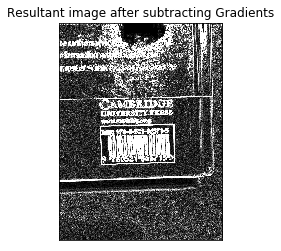

In [32]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

fig = plt.figure()
ax = plt.subplot("111")
ax.set_title("Resultant image after subtracting Gradients")
plt.xticks([]), plt.yticks([])
plt.imshow(gradient,cmap="gray")

### 5. Blur and threshold the image

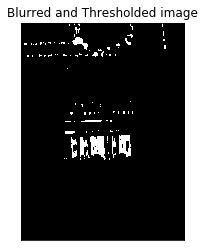

In [35]:
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
fig = plt.figure()
ax = plt.subplot("111")
ax.set_title("Blurred and Thresholded image")
plt.xticks([]), plt.yticks([])
plt.imshow(thresh,cmap="gray")

### 6. Construct a closing kernel and apply it to the thresholded image

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

### 7. Perform a series of erosions and dilations

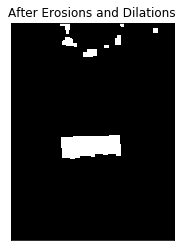

In [37]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)
fig = plt.figure()
ax = plt.subplot("111")
ax.set_title("After Erosions and Dilations")
plt.xticks([]), plt.yticks([])
plt.imshow(closed,cmap="gray")

### 8. Find the contours in the thresholded image, sorting the contours by their area, keeping only the largest one

In [43]:
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

### 9. Compute the rotated bounding box of the largest contour

In [39]:
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)

### 10. Draw a bounding box around the detected barcode and display the image

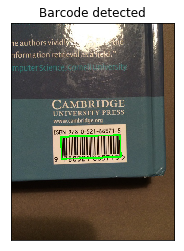

In [41]:
final = cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
fig = plt.figure()
ax = plt.subplot("111")
ax.set_title("Barcode detected")
plt.xticks([]), plt.yticks([])
plt.imshow(final,cmap="gray")